In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,Flatten
from keras.initializers import Constant

In [2]:
with open('stories.txt',encoding='utf8') as f:
    data=f.read()

In [3]:
data[:300]

'Dr Tomas Streyer looked around the control room at his team of scientists and engineers. He was excited and frightened but he tried to seem calm. \nIn a few minutes, they might start to discover something amazing: how the universe began.\nHe looked out of the window at the beautiful blue summer sky an'

In [4]:
data1=data.split('\n')

In [5]:
data1[0]

'Dr Tomas Streyer looked around the control room at his team of scientists and engineers. He was excited and frightened but he tried to seem calm. '

In [6]:
data1[1]

'In a few minutes, they might start to discover something amazing: how the universe began.'

In [7]:
data1[200]

'Kate managed to smile and say thank you. He really was being very sweet, even if she was too tired to feel grateful or to be nice back. As soon as he had left for work, she picked up the box of Limeren. '

In [8]:
data1[0:10]

['Dr Tomas Streyer looked around the control room at his team of scientists and engineers. He was excited and frightened but he tried to seem calm. ',
 'In a few minutes, they might start to discover something amazing: how the universe began.',
 'He looked out of the window at the beautiful blue summer sky and tried to breathe slowly.',
 "'Ready,' he said. He pressed the first button and the complicated computers and machines came to life.",
 "'Set,' he said. He pressed the second button and switched on the large particle accelerator that lay under the towns and fields of Switzerland.",
 "'Go,' he said. And, at exactly twelve o'clock, he pressed the final button.",
 'For a second, he felt as if he was blind, because everything went completely black. Tomas shouted in shock, but the lights were already on again. That was not part of his plan. He had no idea what had just happened.',
 "'Everybody, check the systems!' he ordered. But nothing seemed to be wrong with them. The particle accel

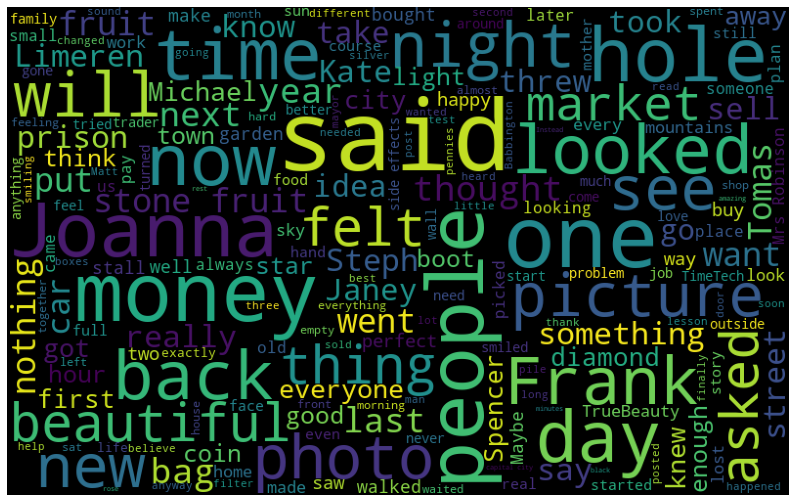

In [9]:
plt.figure(figsize=(14,18))
all_sen=' '.join(data1)
wordcloud_sen=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(all_sen)
plt.imshow(wordcloud_sen)
plt.axis('off')
plt.show()

In [10]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data1)

In [11]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

1731

In [12]:
seq=tokenizer.texts_to_sequences(data1)

In [13]:
seq[0]

[473,
 96,
 474,
 54,
 220,
 1,
 1092,
 475,
 20,
 21,
 598,
 10,
 599,
 4,
 1093,
 12,
 5,
 476,
 4,
 758,
 15,
 12,
 221,
 3,
 1094,
 1095]

In [14]:
tokenizer.word_index['looked']

54

In [15]:
maxlen=max([len(i) for i in seq])
maxlen

50

In [16]:
b=[473,96,474,54,220,1,1092,475,20,21,598,10,599,4,1093,12,5,476,4,758,15,12,221,3,1094,1095]

In [17]:
c=[]
for i in range(len(b)):
    c.append(b[:i+2])

In [18]:
seq2=[]
for i in seq:
    for j in range(len(i)):
        seq2.append(i[:j+2])

In [19]:
seq2[:10]

[[473, 96],
 [473, 96, 474],
 [473, 96, 474, 54],
 [473, 96, 474, 54, 220],
 [473, 96, 474, 54, 220, 1],
 [473, 96, 474, 54, 220, 1, 1092],
 [473, 96, 474, 54, 220, 1, 1092, 475],
 [473, 96, 474, 54, 220, 1, 1092, 475, 20],
 [473, 96, 474, 54, 220, 1, 1092, 475, 20, 21],
 [473, 96, 474, 54, 220, 1, 1092, 475, 20, 21, 598]]

In [20]:
pad_seq=pad_sequences(seq2,maxlen=maxlen,padding='pre')

In [21]:
pad_seq

array([[  0,   0,   0, ...,   0, 473,  96],
       [  0,   0,   0, ..., 473,  96, 474],
       [  0,   0,   0, ...,  96, 474,  54],
       ...,
       [  0,   0,   0, ...,   6, 756,  74],
       [  0,   0,   0, ..., 756,  74, 176],
       [  0,   0,   0, ..., 756,  74, 176]])

In [22]:
X=pad_seq[:,:-1]
y=pad_seq[:,-1]

In [23]:
X

array([[  0,   0,   0, ...,   0,   0, 473],
       [  0,   0,   0, ...,   0, 473,  96],
       [  0,   0,   0, ..., 473,  96, 474],
       ...,
       [  0,   0,   0, ...,   5,   6, 756],
       [  0,   0,   0, ...,   6, 756,  74],
       [  0,   0,   0, ...,   6, 756,  74]])

In [24]:
y

array([ 96, 474,  54, ...,  74, 176, 176])

In [25]:
len(X)

12809

In [26]:
len(y)

12809

In [27]:
glove_file=open('glove.6B.100d.txt',encoding='utf8')
embedding_dictionary=dict()
for i in glove_file:
    record=i.split()
    word=record[0]
    vector=np.asarray(record[1:],dtype='float32')
    embedding_dictionary[word]=vector
glove_file.close()

In [28]:
embedding_dictionary['looked']

array([-0.070273,  0.3957  ,  0.50132 , -0.33858 , -0.24031 ,  0.16799 ,
        0.34926 ,  0.30973 , -0.30092 , -0.59474 ,  0.21461 ,  0.23191 ,
        0.16802 , -0.17396 ,  0.11017 , -0.10937 , -0.32457 ,  0.46059 ,
        0.037429, -0.37635 ,  0.21633 ,  0.65939 ,  0.12166 , -0.49254 ,
        0.22647 , -0.16528 , -0.18059 , -0.63866 , -0.21605 , -0.21671 ,
        0.033223,  0.24348 , -0.21565 ,  0.18994 ,  0.69463 , -0.055685,
       -0.4209  ,  0.10172 ,  0.23991 ,  0.23593 , -0.18638 , -0.50182 ,
        0.33522 , -0.34854 , -0.19606 , -0.16323 ,  0.36512 ,  1.0292  ,
        0.55206 , -0.98423 ,  0.47221 , -0.39665 ,  0.20183 ,  0.98532 ,
       -0.21708 , -2.1838  , -0.44664 ,  0.29949 ,  0.47532 ,  0.57396 ,
       -0.22004 ,  1.1445  , -0.63401 ,  0.18888 , -0.13532 ,  0.040717,
        0.34716 ,  0.30923 , -0.62222 ,  0.21    ,  0.49468 , -0.014985,
        0.12134 , -0.56989 ,  0.32773 ,  0.11874 , -0.3072  ,  0.17143 ,
        0.069065, -0.23904 ,  0.50952 ,  0.28282 , 

In [29]:
embedding_matrix=np.zeros((vocab_size,100))
for word,index in tokenizer.word_index.items():
    embedding_vector=embedding_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector

In [30]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [31]:
tokenizer.word_index['the']

1

In [46]:
i=Input(shape=(in_shape,))
x=Embedding(vocab_size,100,embeddings_initializer=Constant(embedding_matrix),trainable=False)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(vocab_size,activation='softmax')(x)
model=Model(inputs=i,outputs=x)

In [47]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [48]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 49)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 49, 100)             │         173,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 49, 10)              │           4,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 490)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1731)                │         849,921 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,027,461 (3.92 MB)

 Trainable params: 1,027,461 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history=model.fit(X,y,epochs=100)

Epoch 1/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.0534 - loss: 6.5448
Epoch 2/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.0705 - loss: 5.7837
Epoch 3/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.1193 - loss: 5.0085
Epoch 4/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.2076 - loss: 4.3040
Epoch 5/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3036 - loss: 3.7031
Epoch 6/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3794 - loss: 3.2539
Epoch 7/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4390 - loss: 2.8992
Epoch 8/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4802 - loss: 2.6646
Epoch 9/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5353 - loss: 2.4339
Epoch 10/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5674 - loss: 2.2474
Epoch 11/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5928 - loss: 2.1005
Epoch 12/100
401/40

401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9249 - loss: 0.3800
Epoch 68/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9272 - loss: 0.3562
Epoch 69/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9277 - loss: 0.3552
Epoch 70/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9312 - loss: 0.3465
Epoch 71/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9275 - loss: 0.3596
Epoch 72/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9308 - loss: 0.3464
Epoch 73/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9276 - loss: 0.3425
Epoch 74/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9339 - loss: 0.3273
Epoch 75/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9346 - loss: 0.3205
Epoch 76/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9297 - loss: 0.3343
Epoch 77/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9296 - loss: 0.3343
Epoch 78/100
401/401 ━━

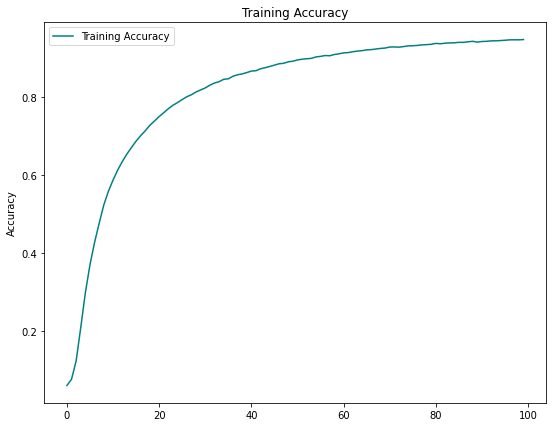

In [50]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],color='teal',label='Training Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

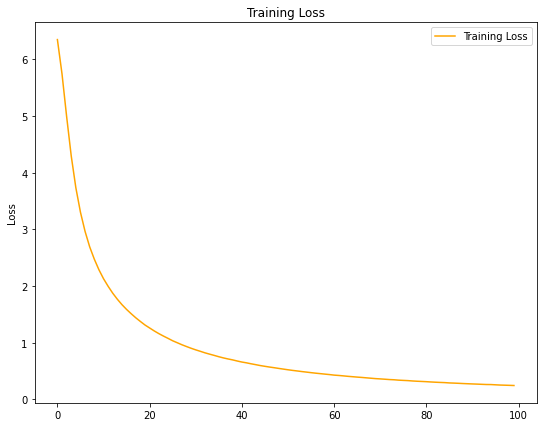

In [51]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],color='orange',label='Training Loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [159]:
def next_word(input_text,predict_next_words):
    for _ in range(predict_next_words):
        input_seq=tokenizer.texts_to_sequences([input_text])[0]
        input_pad=np.array(pad_sequences([input_seq],maxlen=maxlen-1,padding='pre'))
        predict=np.argmax(model.predict(input_pad),axis=-1)
        output_text=''
        for word,index in tokenizer.word_index.items():
            if predict==index:
                output_text=word
                break
        input_text=input_text+' '+output_text
    return input_text

In [161]:
next_word('hi',5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'hi i do that to be'

In [163]:
next_word('she said',5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'she said off her belt and threw'

In [167]:
next_word('she looked up',5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'she looked up and saw michael smiling at'

In [168]:
next_word('after',5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'after she sold the fruit she'